In [49]:
import numpy as np

#load train and test data
train_data   = []
test_data = []
train_labels = []
test_labels = []

with open("train_set.txt") as f:  
        for line in f:
            tokens = line.strip().split(' ')  
            train_data.append([float(tk) for tk in tokens[:-1]])  
            train_labels.append(int(tokens[-1]))  
x_train = np.array(train_data)
y_train = np.array(train_labels)

with open("test_set.txt") as ff:  
        for line in ff:
            tokens = line.strip().split(' ')  
            test_data.append([float(tk) for tk in tokens[:-1]])  
            test_labels.append(int(tokens[-1])) 
x_test = np.array(test_data)
y_test = np.array(test_labels)

The optimal number of neighbors k is 4


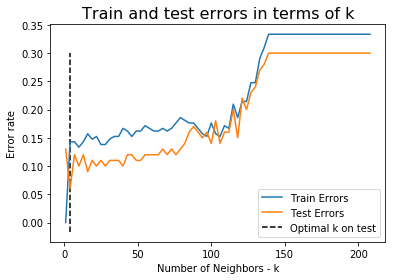

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


#train KNN, calculate train and test errors
train_error = []
test_error = []
k_range = np.arange(208, 0, -3)

for k in k_range:
   knn = KNeighborsClassifier(n_neighbors = k)
   knn.fit(x_train, y_train)
   train_error.append(1 - accuracy_score(y_train, knn.predict(x_train)))
   test_error.append(1 - accuracy_score(y_test, knn.predict(x_test)))

#print(train_error)
#print(test_error)
   
# determining best k
optimal_k = k_range[test_error.index(min(test_error))]
print("The optimal number of neighbors k is %d" % optimal_k)

# plot train and test errors vs k
import matplotlib.pyplot as plt

plt.title('Train and test errors in terms of k', fontsize=16)
plt.plot(k_range, train_error, label='Train Errors')
plt.plot(k_range, test_error, label='Test Errors')
plt.vlines(optimal_k, plt.ylim()[0], np.max(test_error), linestyles = 'dashed', label='Optimal k on test')
plt.xlabel('Number of Neighbors - k')
plt.ylabel('Error rate')
plt.legend(loc='lower right')
plt.show()

In [52]:
#Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k is optimal
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#confusion matrix for training sets
cf = confusion_matrix(y_train, knn.predict(x_train))
print('The confusion matrix for training sets is:\n', cf)
TP1 = cf[0,0]
FP1 = cf[1,0]
TN1 = cf[1,1]
FN1 = cf[0,1]
tpr1 =  TP1 / (TP1 + FN1)
tnr1 = TN1 / (TN1 + FP1)
print('True positive rate: %.2f' % tpr1, 'True negative rate: %.2f' % tnr1)

precision1 = TP1 / (TP1 + FP1)
recall1 = TP1 / (TP1 + FN1)
f1_score1 = (2 * precision1 * recall1) / (precision1 + recall1)
#print(precision1, recall1, f1_score1)
print(classification_report(y_train, knn.predict(x_train)))
print('\n\n')


#confusion matrix for test sets
conf = confusion_matrix(y_test, y_pred)
print('The confusion matrix for test sets is:\n', conf)

TP = conf[0,0]
FP = conf[1,0]
TN = conf[1,1]
FN = conf[0,1]
tpr =  TP / (TP + FN)
tnr = TN / (TN + FP)
print('True positive rate: %.2f' % tpr, 'True negative rate: %.2f' % tnr)

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * precision * recall) / (precision + recall)
#print(precision, recall, f1_score)
print(classification_report(y_test,y_pred))

The confusion matrix for training sets is:
 [[ 64   6]
 [ 24 116]]
True positive rate: 0.91 True negative rate: 0.83
             precision    recall  f1-score   support

          0       0.73      0.91      0.81        70
          1       0.95      0.83      0.89       140

avg / total       0.88      0.86      0.86       210




The confusion matrix for test sets is:
 [[25  5]
 [ 1 69]]
True positive rate: 0.83 True negative rate: 0.99
             precision    recall  f1-score   support

          0       0.96      0.83      0.89        30
          1       0.93      0.99      0.96        70

avg / total       0.94      0.94      0.94       100



In [68]:
from sklearn.learning_curve import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#N - size of the training set
n_range = np.arange(10, 211, 10)
optimal_ks = []
best_test_error_rate = []

for n in n_range:
    train0_data = []
    train0_labels = []
    train1_data = []
    train1_labels = []
    
    train0_size = int(n / 3)
    train1_size = n - train0_size
    #print(n, train0_size, train1_size)
    
    with open("train_set.txt") as f:  
        for line in f.readlines()[0:train0_size]:
            tokens = line.strip().split(' ')  
            train0_data.append([float(tk) for tk in tokens[:-1]])  
            train0_labels.append(int(tokens[-1]))
        f.close()
    #print(train0_data)
    with open("train_set.txt") as f:   
        for line in f.readlines()[70:(70+train1_size)]:
            tokens = line.strip().split(' ')  
            train1_data.append([float(tk) for tk in tokens[:-1]])  
            train1_labels.append(int(tokens[-1]))
        f.close()

    train_data = train0_data + train1_data
    train_labels = train0_labels + train1_labels

    x_train = np.array(train_data)
    y_train = np.array(train_labels)

 
    k_rag = np.arange(1, n, 5)
    for i in k_rag:
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        test_err = 1 - accuracy_score(y_test, knn.predict(x_test))
        test_error.append(test_err)
        #print(test_error)
    best_test_error_rate.append(min(test_error))
    optimal_ks.append(k_rag[test_error.index(min(test_error))])
    test_error = []
    
print('The best error rate for each N are:', best_test_error_rate)   
print('The optimal k for each N are:', optimal_ks)

The best error rate for each N are: [0.25, 0.19999999999999996, 0.21999999999999997, 0.25, 0.30000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.25, 0.21999999999999997, 0.17000000000000004, 0.16000000000000003, 0.15000000000000002, 0.13, 0.13, 0.13, 0.09999999999999998, 0.08999999999999997, 0.08999999999999997, 0.07999999999999996]
The optimal k for each N are: [1, 6, 1, 11, 26, 21, 26, 31, 41, 6, 6, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6]


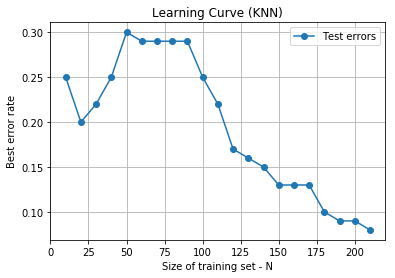

In [69]:
#plot learning curve with best error rate vs N
import matplotlib.pyplot as plt

plt.plot(n_range, best_test_error_rate,'-o', label='Test errors')
plt.grid()
plt.title('Learning Curve (KNN)')
plt.xlabel('Size of training set - N')
plt.ylabel('Best error rate')
plt.legend(loc='best')
plt.show()